In [25]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [26]:
df = pd.read_csv("../data/processed/charging_sessions_cleaned.csv")

print(df.head())

   Unnamed: 0                        id             connectionTime  \
0           0  5e23b149f9af8b5fe4b973cf  2020-01-02 13:08:54+00:00   
1           1  5e23b149f9af8b5fe4b973d0  2020-01-02 13:36:50+00:00   
2           2  5e23b149f9af8b5fe4b973d1  2020-01-02 13:56:35+00:00   
3           3  5e23b149f9af8b5fe4b973d2  2020-01-02 13:59:58+00:00   
4           4  5e23b149f9af8b5fe4b973d3  2020-01-02 14:00:01+00:00   

              disconnectTime           doneChargingTime  kWhDelivered  \
0  2020-01-02 19:11:15+00:00  2020-01-02 17:31:35+00:00        25.016   
1  2020-01-02 22:38:21+00:00  2020-01-02 20:18:05+00:00        33.097   
2  2020-01-03 00:39:22+00:00  2020-01-02 16:35:06+00:00         6.521   
3  2020-01-02 16:38:39+00:00  2020-01-02 15:18:45+00:00         2.355   
4  2020-01-02 22:08:40+00:00  2020-01-02 18:17:30+00:00        13.375   

                                sessionID  siteID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  1-1-179-810   
1  1_1_1

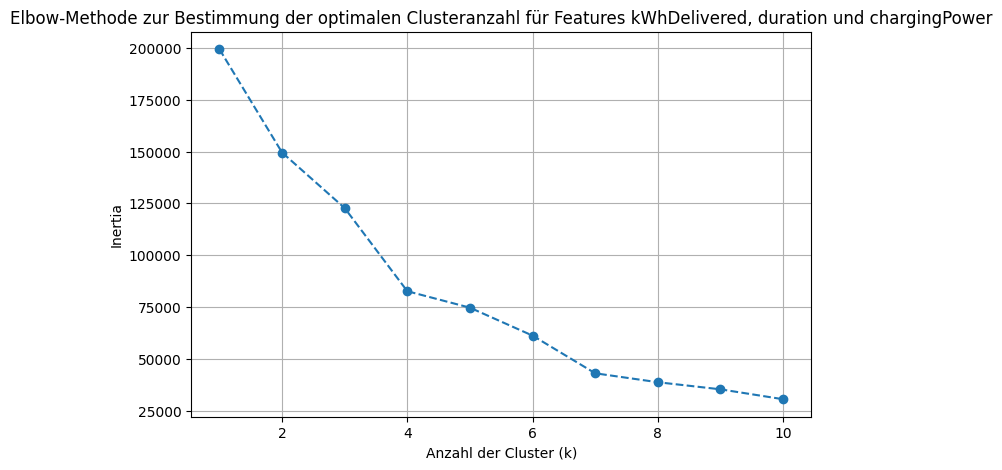

In [27]:
# Auswahl der relevanten Merkmale
features = df[['kWhDelivered', 'duration', 'chargingPower']].copy()

# Normalisierung der Daten
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Bestimmung der optimalen Anzahl an Clustern mit der Elbow-Methode
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Elbow-Plot erstellen
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl für Features kWhDelivered, duration und chargingPower')
plt.xlabel('Anzahl der Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

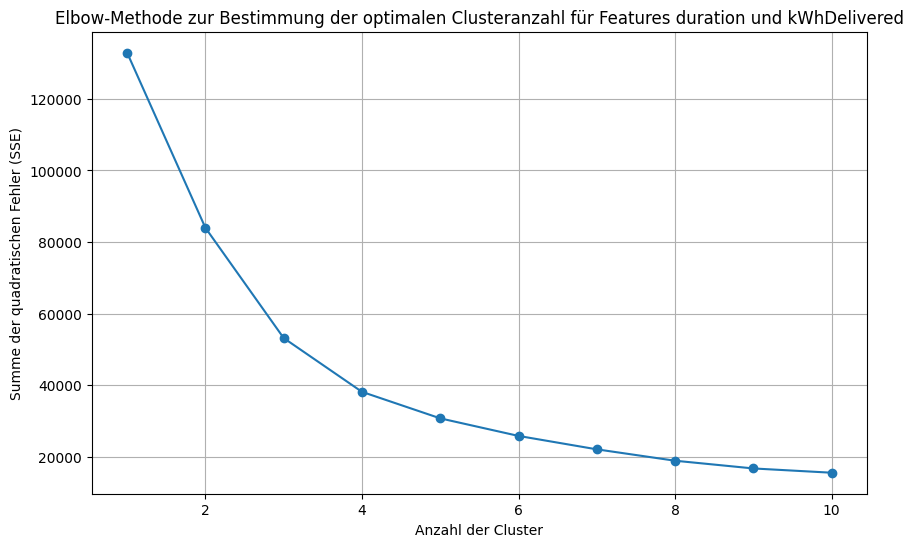

In [28]:
#Filter Values
df_cleaned = df[(df['duration'] <= 100) & (df['kWhDelivered'] <= 100)]
#Select columns for clustering
data = df_cleaned[['duration', 'kWhDelivered']]

#Scale data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Bestimmung der optimalen Anzahl an Clustern mit der Elbow-Methode
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

#Plot SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl für Features duration und kWhDelivered')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Summe der quadratischen Fehler (SSE)')
plt.grid(True)
plt.show()

C:\Users\maximilian.j.mueller\AppData\Local\Temp\ipykernel_11412\509534817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = kmeans.fit_predict(data_scaled)


Cluster-Zentren (3 Cluster):
Cluster 1: Ladezeit = 8.18 Stunden, Energie = 33.93 kWh
Cluster 2: Ladezeit = 9.52 Stunden, Energie = 9.75 kWh
Cluster 3: Ladezeit = 2.87 Stunden, Energie = 7.50 kWh


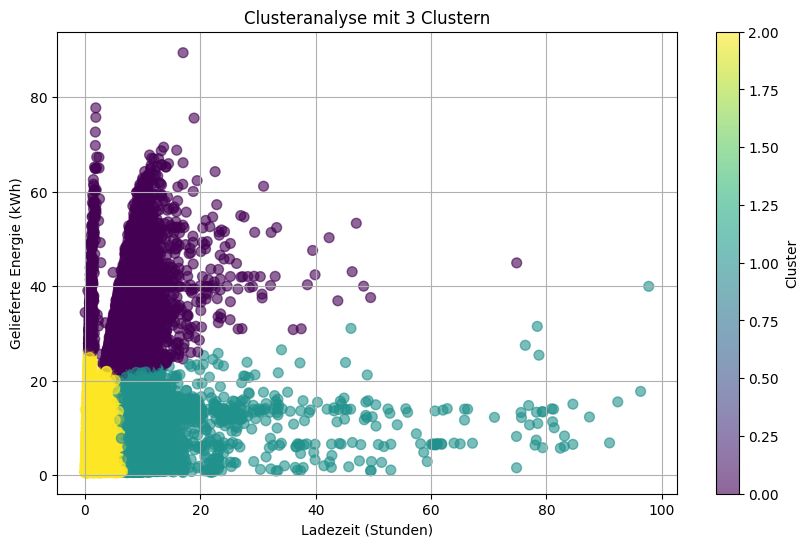

In [30]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(data_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

print("Cluster-Zentren (3 Cluster):")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: Ladezeit = {center[0]:.2f} Stunden, Energie = {center[1]:.2f} kWh")


#Plot the cluster
plt.figure(figsize=(10, 6))
plt.scatter(data['duration'], data['kWhDelivered'], c=df_cleaned['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.xlabel("Ladezeit (Stunden)")
plt.ylabel("Gelieferte Energie (kWh)")
plt.title("Clusteranalyse mit 3 Clustern")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()